In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')

import dataset
import numbs
import backprop
import gp_backprop

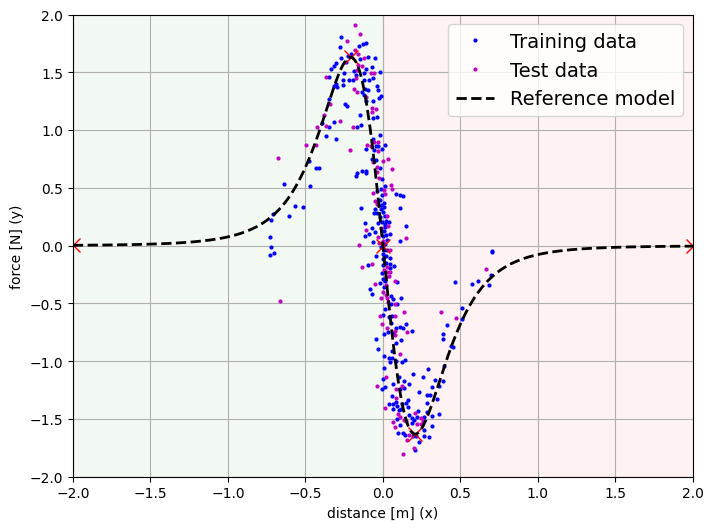

In [2]:
S = dataset.MagmanDatasetScaled()
#S.sample(size=250, noise=0.03, mesh=False)
S.load('../data/magman.csv')
S.split()
S.plot(width=8, height=6, plot_knowldege=True)

S.index()
numbs.init(S)

S_train = dataset.NumpyDataset(S)
S_test  = dataset.NumpyDataset(S, test=True)

In [3]:
population = gp_backprop.random_population(popsize=10, max_depth=2)
best_stree, best_eval, _ = gp_backprop.evaluate(population, S_train, S_test)

--- Best Syntax Tree ---
((A(x) * B(x)) * (C(x) - D(x)))
Training
	mse: 0.7509273854206142
	rmse: 0.8665606645934341
	r2: 0.2830013421716733
Testing
	mse: 0.7971252070478183
	rmse: 0.8928186865471726
	r2: 0.25062651639915745
Knowledge
	mse: 0.1694810846122177
	rmse: 0.4116808042795021



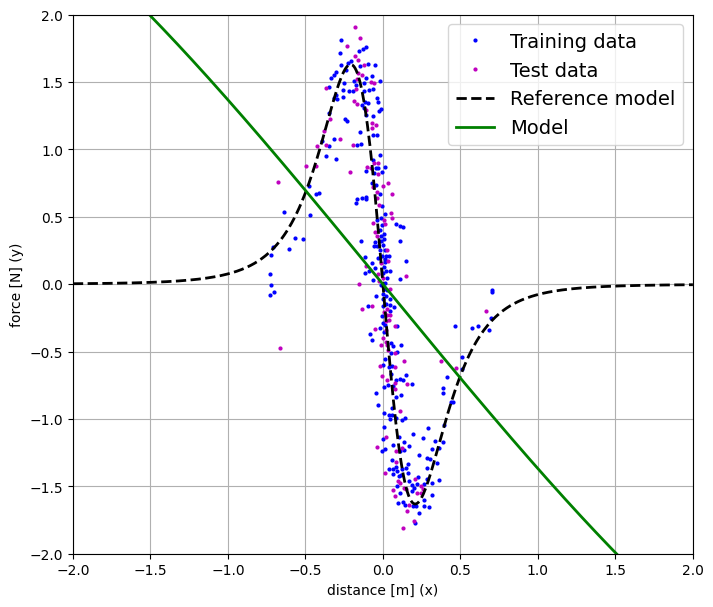

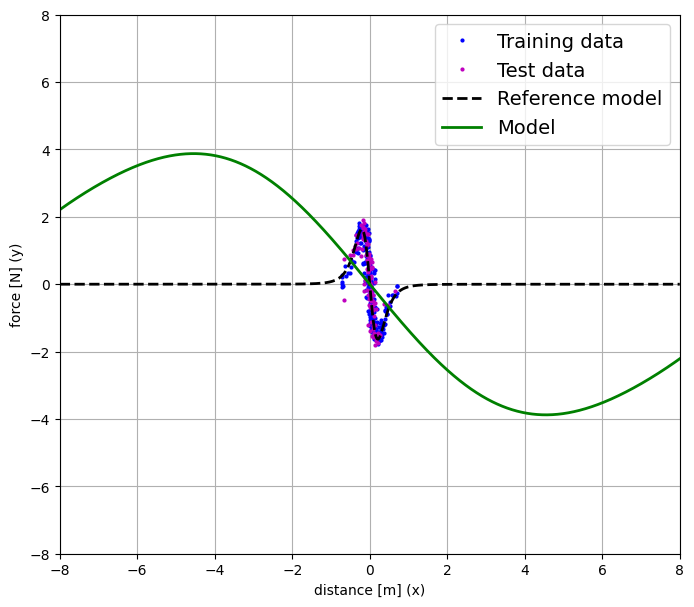

In [4]:
print("--- Best Syntax Tree ---")
print(best_stree)
print(best_eval)

if best_stree is not None:
    S.plot(width=8, height=7, model=best_stree.compute_output, savename='results/magman.pdf')
    plt.show()
    S.plot(width=8, height=7, model=best_stree.compute_output, zoomout=4., savename='results/magman-wide.pdf')
    plt.show()
    #xp = np.linspace(S.xl, S.xu, 500)
    #plt.plot(xp, best_stree.compute_output(xp), color='green', linewidth=2, label='Model');
    #plt.show()

In [5]:
if best_stree is not None:
    unkn_collector = backprop.UnknownSyntaxTreeCollector()
    best_stree.accept(unkn_collector)
    for unkn_label in unkn_collector.unknown_labels:
        print(f"{unkn_label}(x) =\n{best_stree.get_unknown_stree(unkn_label).model}\n")

A(x) =
            5             3
-2.528e-06 x + 0.0008427 x - 0.1264 x

B(x) =
            6             4             2
-5.339e-07 x + 3.022e-06 x - 2.045e-05 x - 5.397

C(x) =
          6             4           2
7.08e-07 x - 0.0001461 x + 0.01802 x - 1.049

D(x) =
            6             4           2
-6.789e-07 x + 0.0001401 x - 0.01728 x + 1.005

